In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
from sklearn.preprocessing import StandardScaler


- Standardization is another Scaling teaching where techique where the values are centered around the mean with a unot statndard deviation

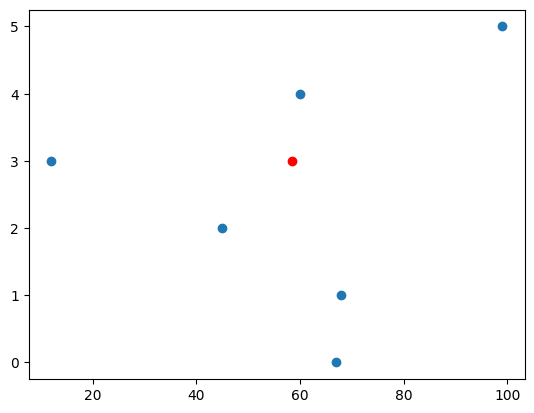

In [8]:
x=np.array([67,68,45,12,60,99])
plt.scatter(x, range(6))
plt.scatter(x.mean(),3,color='r')

In [11]:
std=np.sqrt(np.sum(( x - x.mean())**2)/len(x))
std

26.29797203841645

In [12]:
x.std()

26.29797203841645

## Standerdization

In [14]:
# it make a STD of all features to around 1 for the dataset 

In [21]:
def standerdization(x):
    val=(x-x.mean())/x.std()
    return val

In [22]:
x_new=standerdization(x)

In [23]:
x_new

array([ 0.32321884,  0.36124459, -0.51334757, -1.76819718,  0.05703862,
        1.54004271])

In [24]:
x_new.std()

0.9999999999999999

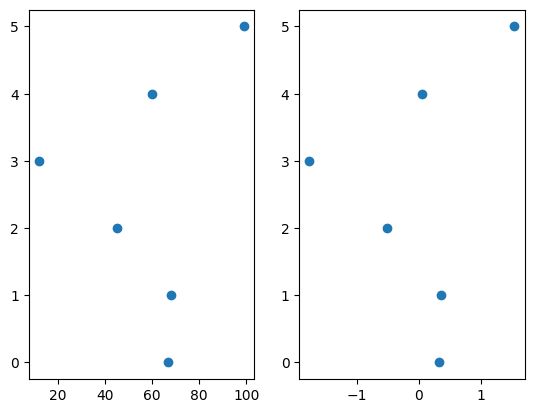

In [25]:
plt.subplot(1,2,1)
plt.scatter(x, range(6))
plt.subplot(1,2,2)
plt.scatter(x_new, range(6))

In [26]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [27]:
x=df[['Age','EstimatedSalary']]

In [28]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [29]:
scaler =StandardScaler()
x_scaled=scaler.fit_transform(x)

In [30]:
x_new=pd.DataFrame(x_scaled,columns=x.columns)

In [31]:
x_new

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [32]:
# ReSampling or Balancing 

In [33]:
!pip install imbalanced-learn

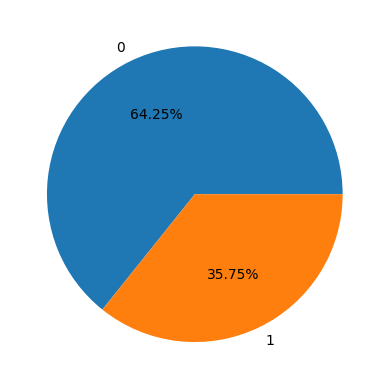

In [39]:
plt.pie(df['Purchased'].value_counts(),labels=df['Purchased'].value_counts().index,autopct='%2.2f%%');

In [40]:
# Q Which is best under sampling or over sampling 

In [41]:
from imblearn.under_sampling import RandomUnderSampler

In [44]:
rus=RandomUnderSampler(random_state=0)

In [45]:
y=df['Purchased']


In [46]:
x_new, y_new=rus.fit_resample(x,y)

In [47]:
y_new.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
ros=RandomOverSampler(random_state=0)

In [50]:
x_new,y_new=ros.fit_resample(x,y)

In [51]:
y_new.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

# Feature Selection 

 ## Types of Features Selection Method 
- Filter Method
- Wrapper Method

- Chi Sequare Method Used to Feature Selection 

In [52]:
df=pd.read_csv('wisc_bc_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [53]:
## Separte I/O variable 

In [55]:
x=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis']

In [58]:
x.shape,y.shape

((569, 30), (569,))

In [60]:
from sklearn.feature_selection import SelectKBest,chi2

In [61]:
skf=SelectKBest(score_func=chi2,k=5)


In [62]:
skf.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x000002ADBAE4BB80>)

In [63]:
skf.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [64]:
x_new=x.iloc[:,skf.get_support()]
x_new

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0
...,...,...,...,...,...
564,142.00,1479.0,158.70,166.10,2027.0
565,131.20,1261.0,99.04,155.00,1731.0
566,108.30,858.1,48.55,126.70,1124.0
567,140.10,1265.0,86.22,184.60,1821.0
